In [228]:
# Import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from urllib.parse import urlparse
from sklearn import preprocessing
import seaborn as sns
import re

In [9]:
# Import data
df_init = pd.read_json('data.json', lines = True)
pred_emotions = pd.read_csv('pred_emotions.csv')
pred_news_titles = pd.read_csv('pred_news_titles.csv')

In [82]:
df = df_init
df['pred_news_category'] = pred_news_titles['pred_news_category']
df[['pred_emotion_1', 'pred_emotion_2', 'pred_emotion_3']] = pred_emotions[['pred_emotion_1', 'pred_emotion_2', 'pred_emotion_3']]
df.head(5)

,subreddit,id,title,score,upvote_ratio,url,comment_1,comment_2,comment_3,score_c1,score_c2,score_c3,pred_news_category,pred_emotion_1,pred_emotion_2,pred_emotion_3
0,nottheonion,l7afyx,People Are Accusing Robinhood Of Stealing From...,181832,0.95,https://www.buzzfeednews.com/article/clarissaj...,Not only did Robinhood move the goalposts when...,a class action lawsuit has been filed. further...,"Basically, Robinhood just stated that your acc...",15245,14359,5337,BUSINESS,disappointment,anger,approval
1,nottheonion,gyzw2p,US Military Could Lose Space Force Trademark t...,130123,0.91,https://www.cbr.com/us-military-lose-space-for...,Please please PLEASE let this happen. The wor...,"In US trademark law it's first to use, not fir...","It sounds silly, but some years ago the UK pol...",12325,11535,5548,POLITICS,amusement,amusement,disapproval
2,nottheonion,jrskag,White House threatens to fire anyone who tries...,127328,0.89,https://americanindependent.com/white-house-th...,The penalty for attempted suicide is death,Daily beatings will continue until morale impr...,"From what I understood, they said anyone that ...",24384,19378,12375,POLITICS,anger,anger,confusion
3,nottheonion,so0ree,Meta's threat to close down Facebook and Insta...,127326,0.95,https://www.cityam.com/metas-threat-to-close-d...,"Hey guys - while you’re at it, please shut it ...",750 million people in Europe. Even Zucky won't...,As much as I agree with politicians who say li...,18527,17604,6989,POLITICS,anger,neutral,anger
4,nottheonion,g6zci5,Don't eat or inject yourself with disinfectant...,126247,0.94,https://www.cnn.com/world/live-news/coronaviru...,"I'll take ""Shit I never thought would be a hea...",Tide Pod Challenge - White House Edition,I just got a letter from my georgia congressma...,23444,12429,6640,WELLNESS,anger,neutral,anger


In [83]:
# Encoding categories
le_emote = preprocessing.LabelEncoder()
le_emote.fit(df['pred_emotion_1'])

le_news_cat = preprocessing.LabelEncoder()
le_news_cat.fit(df['pred_news_category'])

emote_classes = le_emote.classes_.tolist()
news_classes = le_news_cat.classes_.tolist()

In [84]:
emote_classes

['admiration',
 'amusement',
 'anger',
 'annoyance',
 'approval',
 'confusion',
 'curiosity',
 'disappointment',
 'disapproval',
 'gratitude',
 'neutral']

In [85]:
news_classes

['BUSINESS', 'ENTERTAINMENT', 'POLITICS', 'SPORTS', 'TRAVEL', 'WELLNESS']

In [113]:
pie_data = pd.DataFrame(np.zeros((6, 11)), columns=emote_classes, index=news_classes)
for emotion in emote_classes:
    for news_class in news_classes:
        num = 0
        for comments in ['pred_emotion_1', 'pred_emotion_2', 'pred_emotion_3']:
            num += df[df['pred_news_category'] == news_class][comments].value_counts()[emotion]
        pie_data.loc[news_class, emotion] = num

pie_data

,admiration,amusement,anger,annoyance,approval,confusion,curiosity,disappointment,disapproval,gratitude,neutral
BUSINESS,549.0,222.0,742.0,307.0,666.0,291.0,425.0,405.0,457.0,204.0,661.0
ENTERTAINMENT,449.0,182.0,539.0,190.0,275.0,177.0,231.0,243.0,238.0,149.0,483.0
POLITICS,1103.0,608.0,2990.0,1012.0,1674.0,899.0,1238.0,890.0,1554.0,584.0,1842.0
SPORTS,442.0,175.0,499.0,178.0,251.0,133.0,247.0,267.0,259.0,103.0,422.0
TRAVEL,348.0,124.0,297.0,114.0,265.0,103.0,194.0,204.0,161.0,100.0,379.0
WELLNESS,253.0,76.0,227.0,130.0,256.0,103.0,175.0,183.0,130.0,96.0,333.0


In [162]:
colors_lst = ['#b35900','#0099cc','#009900','#00b300','#cc6600','#00ace6','#e67300','#ff8000','#00bfff','#00e600','#00ff00']
emote_lst = pie_data.sum(axis=0).sort_values(ascending=False).index
colors_dict = dict(zip(emote_lst, colors_lst))
colors_dict

{'anger': '#b35900',
 'neutral': '#0099cc',
 'approval': '#009900',
 'admiration': '#00b300',
 'disapproval': '#cc6600',
 'curiosity': '#00ace6',
 'disappointment': '#e67300',
 'annoyance': '#ff8000',
 'confusion': '#00bfff',
 'amusement': '#00e600',
 'gratitude': '#00ff00'}

In [164]:
colors_dict['anger']

'#b35900'

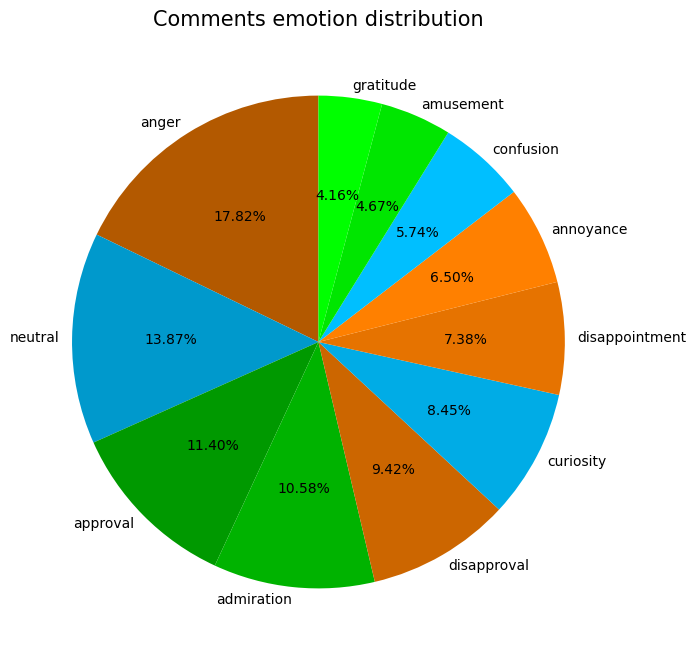

In [165]:
# All_topics-emotion pie plot
plt.figure(figsize=(8, 8))
plt.rc('xtick', labelsize=0)
plt.rc('ytick', labelsize=0)


plt.pie(pie_data.sum(axis=0).sort_values(ascending=False), colors=[colors_dict[i] for i in pie_data.sum(axis=0).sort_values(ascending=False).index], labels=pie_data.sum(axis=0).sort_values(ascending=False).index, startangle=90, frame=False, labeldistance=1.05, autopct='%1.2f%%', textprops={"size":10})

plt.title('Comments emotion distribution', fontsize=15)

plt.show()

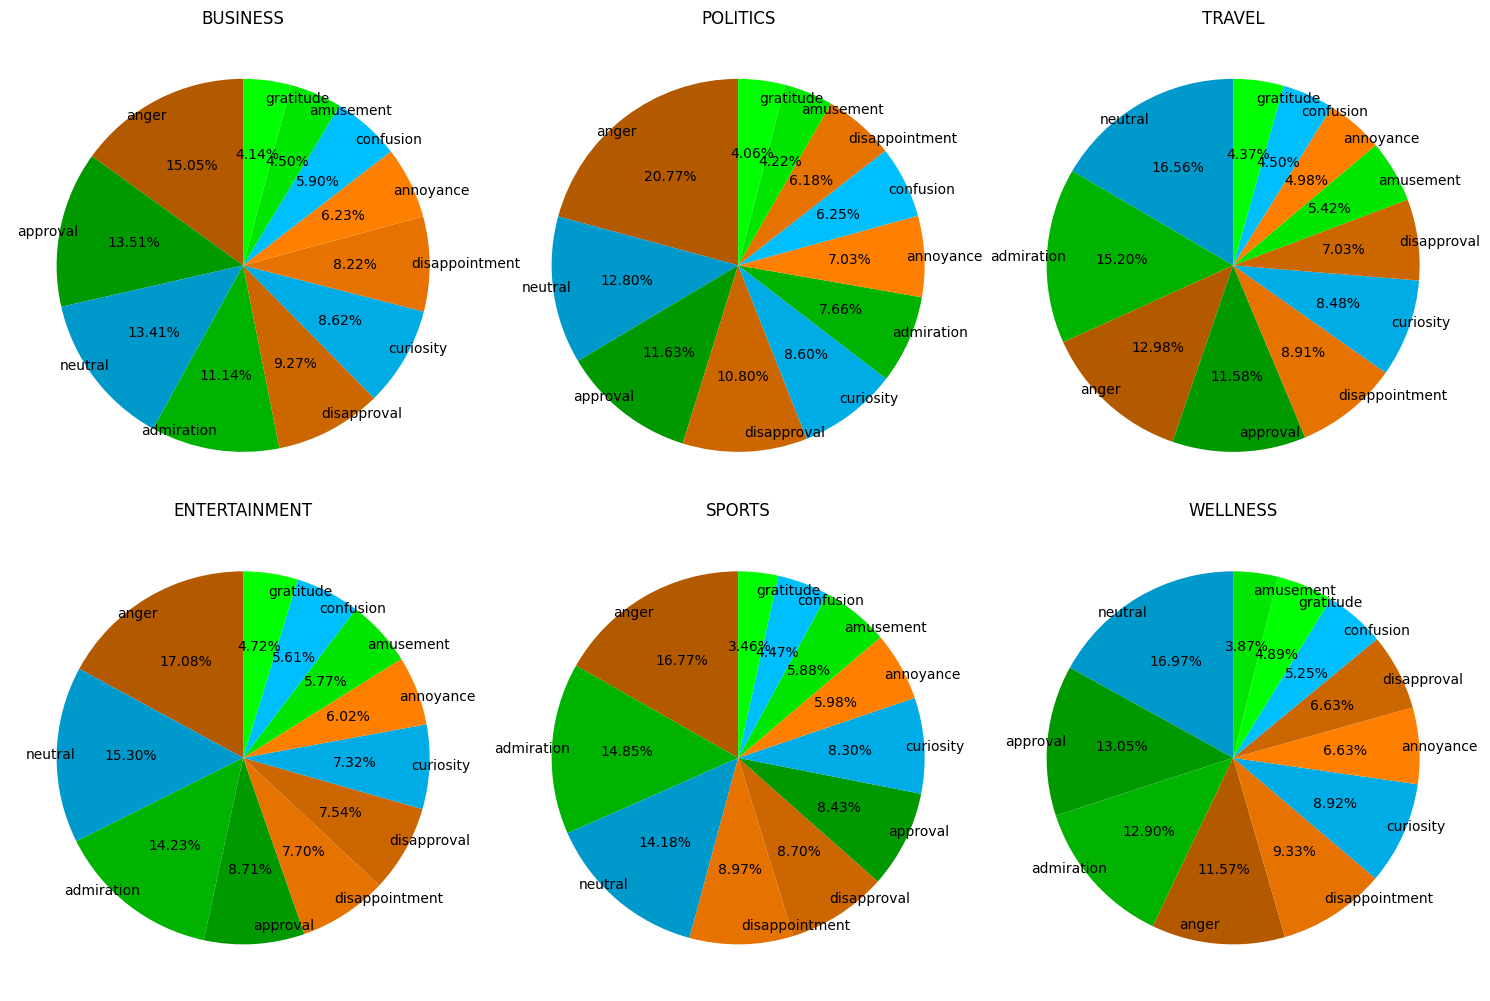

In [169]:
# Topic-emotion pie plots
figure, axis = plt.subplots(2, 3, figsize=(15,10))
figure.tight_layout()
for i, topic in enumerate(news_classes):

    data = pie_data.loc[topic].sort_values(ascending=False)

    axis[i % 2, i // 2].pie(data, labels=data.index, colors=[colors_dict[i] for i in data.index], startangle=90, frame=False, autopct='%1.2f%%', textprops={"size":10}, labeldistance=0.9)
    axis[i % 2, i // 2].title.set_text(topic)
    #axis[i % 2, i // 2].legend()

plt.show() 

In [170]:
# Distribution % data
df_dist = pd.DataFrame(np.zeros((11, 7)), index=emote_classes, columns=['overall'] + news_classes)
for emote in emote_classes:
    df_dist.loc[emote, 'overall'] = pie_data[emote].sum() / pie_data.values.sum()
    for news_cat in news_classes:
        df_dist.loc[emote, news_cat] = pie_data.loc[news_cat][emote] / pie_data.loc[news_cat].values.sum()

df_dist

,overall,BUSINESS,ENTERTAINMENT,POLITICS,SPORTS,TRAVEL,WELLNESS
admiration,0.105837,0.111382,0.142269,0.076629,0.148522,0.152031,0.128950
amusement,0.046691,0.045040,0.057668,0.042240,0.058804,0.054172,0.038736
anger,0.178213,0.150538,0.170786,0.207725,0.167675,0.129751,0.115698
annoyance,0.065004,0.062284,0.060203,0.070307,0.059812,0.049803,0.066259
approval,0.114017,0.135119,0.087136,0.116298,0.084341,0.115771,0.130479
confusion,0.057429,0.059038,0.056084,0.062457,0.044691,0.044998,0.052497
curiosity,0.084495,0.086224,0.073194,0.086008,0.082997,0.084753,0.089195
disappointment,0.073790,0.082167,0.076996,0.061831,0.089718,0.089122,0.093272
disapproval,0.094223,0.092717,0.075412,0.107962,0.087030,0.070336,0.066259
gratitude,0.041608,0.041388,0.047212,0.040572,0.034610,0.043687,0.048930


In [188]:
df_dist_difference = pd.DataFrame(np.zeros((11, 6)), index=emote_classes, columns=news_classes)
for emote in emote_classes:
    for news_cat in news_classes:
        df_dist_difference.loc[emote, news_cat] = (df_dist.loc[emote, news_cat] / df_dist.loc[emote, 'overall'] - 1) * 100
df_dist_difference

,BUSINESS,ENTERTAINMENT,POLITICS,SPORTS,TRAVEL,WELLNESS
admiration,5.238625,34.422196,-27.597151,40.330148,43.646514,21.838111
amusement,-3.536754,23.509996,-9.533082,25.942653,16.022871,-17.037409
anger,-15.529449,-4.167678,16.560105,-5.913382,-27.193376,-35.078717
annoyance,-4.183245,-7.385602,8.158565,-7.987045,-23.383738,1.930992
approval,18.507106,-23.576895,2.000649,-26.027589,1.538107,14.437917
confusion,2.801469,-2.343440,8.753525,-22.181319,-21.646828,-8.587966
curiosity,2.047076,-13.374563,1.791052,-1.772185,0.305880,5.562460
disappointment,11.352464,4.345303,-16.206152,21.585549,20.778047,26.402515
disapproval,-1.599193,-19.964762,14.580521,-7.634855,-25.351453,-29.678905
gratitude,-0.528869,13.468413,-2.488227,-16.817876,4.997731,17.597459


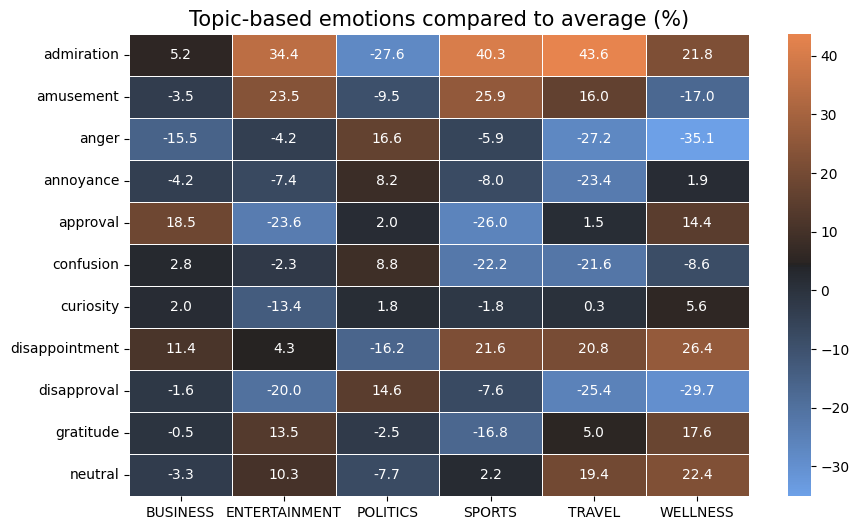

In [209]:
plt.figure(figsize=(10, 6))
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.title('Topic-based emotions compared to average (%)', fontsize=15)
cmap = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)
sns.heatmap(df_dist_difference, cmap=cmap, annot=True, fmt=".1f", linewidths=0.5, linecolor='white')
plt.show()

In [229]:
# Get urls without unnecessary stuff
df['url_clear'] = df['url'].apply(lambda x: urlparse(str(x)).hostname)
df['url_clear'] = df['url_clear'].apply(lambda x: x.replace('www.',''))
df['url_clear'] = df['url_clear'].apply(lambda x: re.sub(r'\..*',"", x))
df['url_clear'].head(5)

0           buzzfeednews
1                    cbr
2    americanindependent
3                 cityam
4                    cnn
Name: url_clear, dtype: object

In [234]:
# Get top-14 news websites
df.url_clear.value_counts()[:14]

cnn               525
theguardian       471
nbcnews           326
apnews            294
bbc               252
reuters           246
cnbc              219
washingtonpost    217
cbsnews           210
abcnews           179
news              177
independent       174
npr               169
nytimes           151
Name: url_clear, dtype: int64

In [255]:
df_top14_url = df[df['url_clear'].isin(df.url_clear.value_counts()[:14].index)]
publishers_lst = df.url_clear.value_counts()[:14].index.tolist()
df_top14_url.head()

,subreddit,id,title,score,upvote_ratio,url,comment_1,comment_2,comment_3,score_c1,score_c2,score_c3,pred_news_category,pred_emotion_1,pred_emotion_2,pred_emotion_3,url_clear
4,nottheonion,g6zci5,Don't eat or inject yourself with disinfectant...,126247,0.94,https://www.cnn.com/world/live-news/coronaviru...,"I'll take ""Shit I never thought would be a hea...",Tide Pod Challenge - White House Edition,I just got a letter from my georgia congressma...,23444,12429,6640,WELLNESS,anger,neutral,anger,cnn
12,nottheonion,jjf87e,White House lists ending Covid-19 pandemic as ...,105970,0.85,https://www.cnn.com/2020/10/27/politics/white-...,"Welcome to 2020, where everything’s made up an...","""The previous administration ended the COVID-1...","It’s been over since Easter, last I heard",17806,14836,8370,POLITICS,gratitude,neutral,neutral,cnn
16,nottheonion,923ww4,"Nat Geo hires Jeff Goldblum to walk around, be...",102805,0.94,https://news.avclub.com/nat-geo-hires-jeff-gol...,"Occasionally joined by Owen ""Wow"" Wilson?",Jeff Goldblum is going to be great at doing this.,"At this point, Jeff Goldblum is just getting p...",18251,11896,9350,TRAVEL,amusement,admiration,approval,news
28,nottheonion,j57d9e,Gay men have taken over the Proud Boys Twitter...,94251,0.79,https://www.cnn.com/2020/10/04/us/proud-boys-t...,"Haha, ""Stand back, and Stand bi""","I mean seriously, you called yourselves the pr...",So is Q-Anon just Queers Anonymous? Edit: so ...,11832,6537,5348,SPORTS,amusement,admiration,anger,cnn
45,nottheonion,hshj4s,White House: 'The science should not stand in ...,85035,0.87,https://www.theguardian.com/us-news/live/2020/...,This is the epitome of science denial. Anyone...,> To be a scientist is to be naive. We are so ...,Jesus fucking christ im so tired at this point.,17759,15844,12296,POLITICS,disapproval,anger,anger,theguardian


In [256]:
pie_data_url = pd.DataFrame(np.zeros((14, 11)), columns=emote_classes, index=publishers_lst)
for emotion in emote_classes:
    for publisher in publishers_lst:
        num = 0
        for comments in ['pred_emotion_1', 'pred_emotion_2', 'pred_emotion_3']:
            num += df_top14_url[df_top14_url['url_clear'] == publisher][comments].value_counts()[emotion]
        pie_data_url.loc[publisher, emotion] = num

pie_data_url

,admiration,amusement,anger,annoyance,approval,confusion,curiosity,disappointment,disapproval,gratitude,neutral
cnn,152.0,68.0,316.0,89.0,182.0,98.0,143.0,103.0,141.0,76.0,207.0
theguardian,153.0,58.0,248.0,96.0,160.0,78.0,125.0,114.0,145.0,46.0,190.0
nbcnews,70.0,43.0,219.0,62.0,110.0,67.0,90.0,74.0,100.0,34.0,109.0
apnews,67.0,32.0,158.0,37.0,123.0,59.0,98.0,57.0,88.0,50.0,113.0
bbc,98.0,31.0,88.0,46.0,105.0,49.0,52.0,67.0,85.0,27.0,108.0
reuters,60.0,25.0,114.0,42.0,106.0,52.0,69.0,61.0,75.0,41.0,93.0
cnbc,59.0,35.0,93.0,26.0,94.0,53.0,61.0,52.0,64.0,14.0,106.0
washingtonpost,51.0,20.0,106.0,47.0,88.0,60.0,62.0,35.0,83.0,38.0,61.0
cbsnews,64.0,29.0,137.0,43.0,80.0,26.0,51.0,55.0,48.0,24.0,73.0
abcnews,53.0,17.0,120.0,35.0,56.0,27.0,40.0,42.0,50.0,30.0,67.0


In [257]:
# Distribution % data for url
df_dist_url = pd.DataFrame(np.zeros((11, 15)), index=emote_classes, columns=['overall'] + publishers_lst)
for emote in emote_classes:
    df_dist_url.loc[emote, 'overall'] = pie_data_url[emote].sum() / pie_data_url.values.sum()
    for publisher in publishers_lst:
        df_dist_url.loc[emote, publisher] = pie_data_url.loc[publisher][emote] / pie_data_url.loc[publisher].values.sum()

df_dist_url

,overall,cnn,theguardian,nbcnews,apnews,bbc,reuters,cnbc,washingtonpost,cbsnews,abcnews,news,independent,npr,nytimes
admiration,0.095476,0.096508,0.108280,0.071575,0.075964,0.129630,0.081301,0.089802,0.078341,0.101587,0.098696,0.114878,0.113027,0.098619,0.081678
amusement,0.040628,0.043175,0.041047,0.043967,0.036281,0.041005,0.033875,0.053272,0.030722,0.046032,0.031657,0.047081,0.042146,0.033531,0.039735
anger,0.177470,0.200635,0.175513,0.223926,0.179138,0.116402,0.154472,0.141553,0.162826,0.217460,0.223464,0.161959,0.178161,0.142012,0.158940
annoyance,0.061588,0.056508,0.067941,0.063395,0.041950,0.060847,0.056911,0.039574,0.072197,0.068254,0.065177,0.073446,0.091954,0.057199,0.061810
approval,0.122438,0.115556,0.113234,0.112474,0.139456,0.138889,0.143631,0.143075,0.135177,0.126984,0.104283,0.099812,0.097701,0.134122,0.110375
confusion,0.064820,0.062222,0.055202,0.068507,0.066893,0.064815,0.070461,0.080670,0.092166,0.041270,0.050279,0.058380,0.053640,0.080868,0.072848
curiosity,0.089474,0.090794,0.088464,0.092025,0.111111,0.068783,0.093496,0.092846,0.095238,0.080952,0.074488,0.080979,0.074713,0.100592,0.099338
disappointment,0.073777,0.065397,0.080679,0.075665,0.064626,0.088624,0.082656,0.079148,0.053763,0.087302,0.078212,0.079096,0.074713,0.051282,0.070640
disapproval,0.101016,0.089524,0.102619,0.102249,0.099773,0.112434,0.101626,0.097412,0.127496,0.076190,0.093110,0.092279,0.093870,0.126233,0.116998
gratitude,0.043675,0.048254,0.032555,0.034765,0.056689,0.035714,0.055556,0.021309,0.058372,0.038095,0.055866,0.035782,0.030651,0.051282,0.070640


In [259]:
df_dist_url_diff = pd.DataFrame(np.zeros((11, 14)), index=emote_classes, columns=publishers_lst)
for emote in emote_classes:
    for publisher in publishers_lst:
        df_dist_url_diff.loc[emote, publisher] = (df_dist_url.loc[emote, publisher] / df_dist_url.loc[emote, 'overall'] - 1) * 100
df_dist_url_diff

,cnn,theguardian,nbcnews,apnews,bbc,reuters,cnbc,washingtonpost,cbsnews,abcnews,news,independent,npr,nytimes
admiration,1.081330,13.411524,-25.033523,-20.436453,35.772620,-14.846441,-5.942256,-17.946501,6.401400,3.373567,20.321498,18.383023,3.292779,-14.451689
amusement,6.268398,1.032619,8.219465,-10.698825,0.928932,-16.620473,31.122873,-24.382070,13.300866,-22.079736,15.883410,3.735632,-17.469069,-2.197471
anger,13.052872,-1.102664,26.177040,0.940064,-34.410254,-12.959062,-20.238621,-8.251294,22.533571,25.916323,-8.740307,0.389321,-19.979804,-10.440973
annoyance,-8.248733,10.314270,2.933196,-31.886098,-1.204160,-7.594983,-35.744457,17.224798,10.823160,5.826975,19.253932,49.304658,-7.126318,0.360416
approval,-5.620915,-7.516820,-8.137394,13.899406,13.436400,17.309838,16.855031,10.404460,3.713280,-14.827641,-18.479604,-20.203360,9.543317,-9.851867
confusion,-4.007597,-14.838405,5.688392,3.198829,-0.007914,8.702198,24.451990,42.187562,-36.331570,-22.432316,-9.934489,-17.247929,24.757666,12.384672
curiosity,1.475257,-1.128180,2.850956,24.183007,-23.124805,4.495457,3.769362,6.442577,-9.523810,-16.748822,-9.493741,-16.497634,12.426036,11.024542
disappointment,-11.358245,9.356441,2.559181,-12.403259,20.125355,12.035369,7.280219,-27.126650,18.332439,6.012404,7.210284,1.268827,-30.490036,-4.251175
disapproval,-11.376338,1.586729,1.221386,-1.229962,11.303357,0.604182,-3.566986,26.214206,-24.575607,-7.826336,-8.649129,-7.074114,24.963491,15.821398
gratitude,10.484244,-25.461099,-20.401043,29.798219,-18.227122,27.202255,-51.210094,33.650296,-12.775596,27.912882,-18.073124,-29.819445,17.417466,61.740616


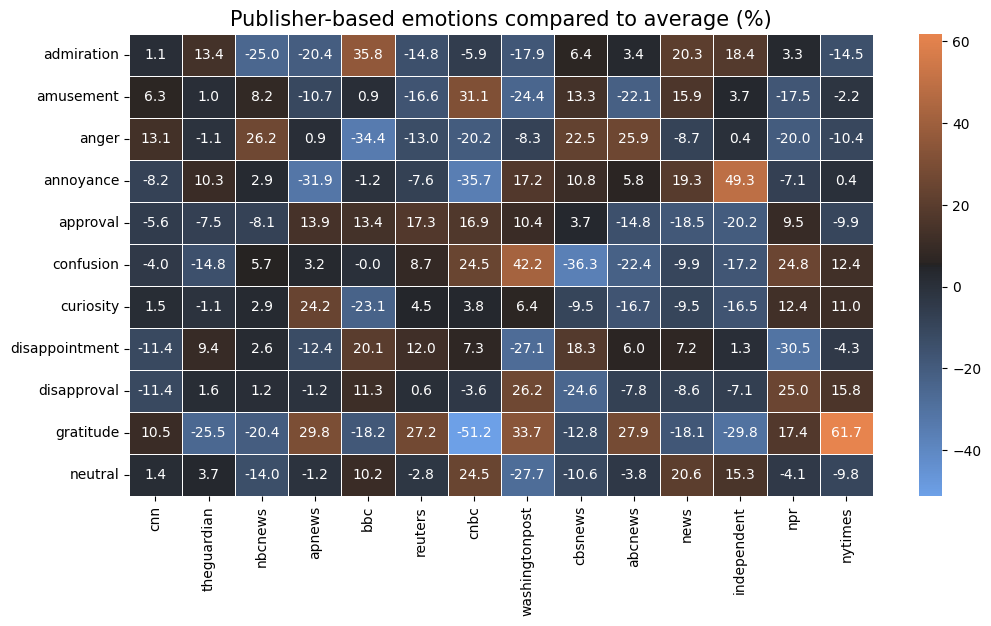

In [271]:
plt.figure(figsize=(12, 6))
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.title('Publisher-based emotions compared to average (%)', fontsize=15)
cmap = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)
sns.heatmap(df_dist_url_diff, cmap=cmap, annot=True, fmt=".1f", linewidths=0.5, linecolor='white')
plt.show()

In [273]:
# Calculate the median of upvote_ratio to split the data evenly
df.upvote_ratio.median()

0.9400000000000001

In [295]:
upvote_ratios_lst = ['<=0.94 upvote ratio', '>0.94 upvote ratio']
pie_data_up_r = pd.DataFrame(np.zeros((2, 11)), columns=emote_classes, index=upvote_ratios_lst)
for emotion in emote_classes:
    for up_r in upvote_ratios_lst:
        num = 0
        for comments in ['pred_emotion_1', 'pred_emotion_2', 'pred_emotion_3']:
            if up_r == upvote_ratios_lst[0]:
                num += df[df['upvote_ratio'] <= 0.94][comments].value_counts()[emotion]
            else:
                num += df[df['upvote_ratio'] > 0.94][comments].value_counts()[emotion]
        pie_data_up_r.loc[up_r, emotion] = num

pie_data_up_r

,admiration,amusement,anger,annoyance,approval,confusion,curiosity,disappointment,disapproval,gratitude,neutral
<=0.94 upvote ratio,1473.0,708.0,2624.0,1018.0,1666.0,881.0,1271.0,1106.0,1416.0,657.0,1961.0
>0.94 upvote ratio,1671.0,679.0,2670.0,913.0,1721.0,825.0,1239.0,1086.0,1383.0,579.0,2159.0


In [296]:
df_dist_up_r = pd.DataFrame(np.zeros((11, 3)), index=emote_classes, columns=['overall'] + upvote_ratios_lst)
for emote in emote_classes:
    df_dist_up_r.loc[emote, 'overall'] = pie_data_up_r[emote].sum() / pie_data_up_r.values.sum()
    for up_r in upvote_ratios_lst:
        df_dist_up_r.loc[emote, up_r] = pie_data_up_r.loc[up_r][emote] / pie_data_up_r.loc[up_r].values.sum()

df_dist_up_r

,overall,<=0.94 upvote ratio,>0.94 upvote ratio
admiration,0.105837,0.099655,0.111960
amusement,0.046691,0.047899,0.045494
anger,0.178213,0.177525,0.178894
annoyance,0.065004,0.068872,0.061173
approval,0.114017,0.112712,0.115310
confusion,0.057429,0.059604,0.055276
curiosity,0.084495,0.085989,0.083015
disappointment,0.073790,0.074826,0.072764
disapproval,0.094223,0.095799,0.092663
gratitude,0.041608,0.044449,0.038794


In [297]:
df_dist_up_r_diff = pd.DataFrame(np.zeros((11, 2)), index=emote_classes, columns=upvote_ratios_lst)
for emote in emote_classes:
    for up_r in upvote_ratios_lst:
        df_dist_up_r_diff.loc[emote, up_r] = (df_dist_up_r.loc[emote, up_r] / df_dist_up_r.loc[emote, 'overall'] - 1) * 100
df_dist_up_r_diff

,<=0.94 upvote ratio,>0.94 upvote ratio
admiration,-5.841275,5.784917
amusement,2.588140,-2.563169
anger,-0.386029,0.382304
annoyance,5.951196,-5.893778
approval,-1.144654,1.133610
confusion,3.785634,-3.749109
curiosity,1.768222,-1.751162
disappointment,1.403965,-1.390419
disapproval,1.671847,-1.655717
gratitude,6.828532,-6.762648


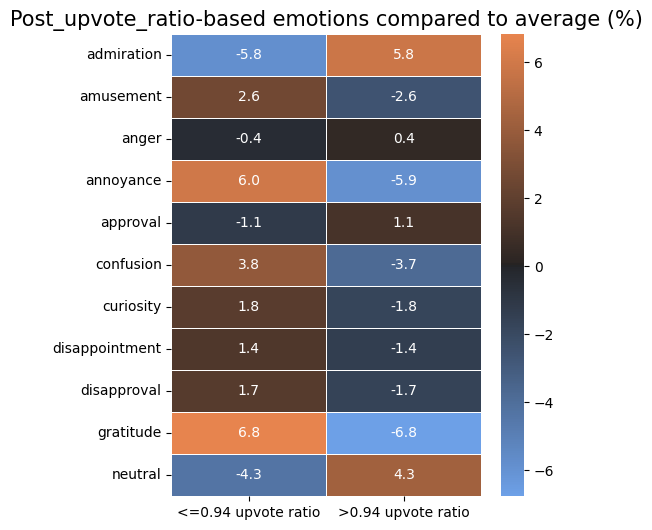

In [299]:
plt.figure(figsize=(5, 6))
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.title('Post_upvote_ratio-based emotions compared to average (%)', fontsize=15)
cmap = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)
sns.heatmap(df_dist_up_r_diff, cmap=cmap, annot=True, fmt=".1f", linewidths=0.5, linecolor='white')
plt.show()


In [301]:
df['subreddit'].value_counts().index.tolist()

['news', 'UpliftingNews', 'nottheonion', 'offbeat', 'inthenews', 'neutralnews']

In [303]:
subreddit_lst = df['subreddit'].value_counts().index.tolist()
pie_data_subr = pd.DataFrame(np.zeros((6, 11)), columns=emote_classes, index=subreddit_lst)
for emotion in emote_classes:
    for subr in subreddit_lst:
        num = 0
        for comments in ['pred_emotion_1', 'pred_emotion_2', 'pred_emotion_3']:
            num += df[df['subreddit'] == subr][comments].value_counts()[emotion]
        pie_data_subr.loc[subr, emotion] = num

pie_data_subr

,admiration,amusement,anger,annoyance,approval,confusion,curiosity,disappointment,disapproval,gratitude,neutral
news,644.0,310.0,1572.0,468.0,893.0,428.0,675.0,654.0,714.0,280.0,958.0
UpliftingNews,1191.0,241.0,553.0,237.0,734.0,248.0,435.0,451.0,362.0,374.0,751.0
nottheonion,478.0,372.0,1031.0,381.0,566.0,291.0,459.0,372.0,501.0,145.0,939.0
offbeat,518.0,264.0,933.0,352.0,457.0,272.0,398.0,351.0,414.0,135.0,763.0
inthenews,227.0,143.0,1038.0,349.0,393.0,204.0,274.0,276.0,494.0,75.0,526.0
neutralnews,86.0,57.0,167.0,144.0,344.0,263.0,269.0,88.0,314.0,227.0,183.0


In [305]:
df_dist_subr = pd.DataFrame(np.zeros((11, 7)), index=emote_classes, columns=['overall'] + subreddit_lst)
for emote in emote_classes:
    df_dist_subr.loc[emote, 'overall'] = pie_data_subr[emote].sum() / pie_data_subr.values.sum()
    for subr in subreddit_lst:
        df_dist_subr.loc[emote, subr] = pie_data_subr.loc[subr][emote] / pie_data_subr.loc[subr].values.sum()

df_dist_subr

,overall,news,UpliftingNews,nottheonion,offbeat,inthenews,neutralnews
admiration,0.105837,0.084781,0.213556,0.086360,0.106650,0.056764,0.040149
amusement,0.046691,0.040811,0.043213,0.067209,0.054355,0.035759,0.026611
anger,0.178213,0.206951,0.099157,0.186269,0.192094,0.259565,0.077965
annoyance,0.065004,0.061611,0.042496,0.068835,0.072473,0.087272,0.067227
approval,0.114017,0.117562,0.131612,0.102258,0.094091,0.098275,0.160598
confusion,0.057429,0.056345,0.044468,0.052575,0.056002,0.051013,0.122782
curiosity,0.084495,0.088863,0.077999,0.082927,0.081944,0.068517,0.125584
disappointment,0.073790,0.086098,0.080868,0.067209,0.072267,0.069017,0.041083
disapproval,0.094223,0.093997,0.064909,0.090515,0.085238,0.123531,0.146592
gratitude,0.041608,0.036862,0.067061,0.026197,0.027795,0.018755,0.105976


In [307]:
df_dist_subr_diff = pd.DataFrame(np.zeros((11, 6)), index=emote_classes, columns=subreddit_lst)
for emote in emote_classes:
    for subr in subreddit_lst:
        df_dist_subr_diff.loc[emote, subr] = (df_dist_subr.loc[emote, subr] / df_dist_subr.loc[emote, 'overall'] - 1) * 100
df_dist_subr_diff

,news,UpliftingNews,nottheonion,offbeat,inthenews,neutralnews
admiration,-19.894460,101.777509,-18.403429,0.768152,-46.366506,-62.064953
amusement,-12.593354,-7.448361,43.943822,16.413552,-23.413478,-43.006792
anger,16.125561,-44.360307,4.520452,7.788835,45.648558,-56.252097
annoyance,-5.218670,-34.625316,5.893488,11.490141,34.256687,3.420094
approval,3.108741,15.431515,-10.313353,-17.476607,-13.807371,40.853602
confusion,-1.887586,-22.568765,-8.453760,-2.486229,-11.173221,113.796914
curiosity,5.169370,-7.687807,-1.855602,-3.019276,-18.909568,48.628902
disappointment,16.680000,9.592169,-8.918759,-2.063937,-6.467767,-44.324153
disapproval,-0.240438,-31.111107,-3.935842,-9.536473,31.104266,55.579173
gratitude,-11.407128,61.174623,-37.038353,-33.197707,-54.925018,154.701848


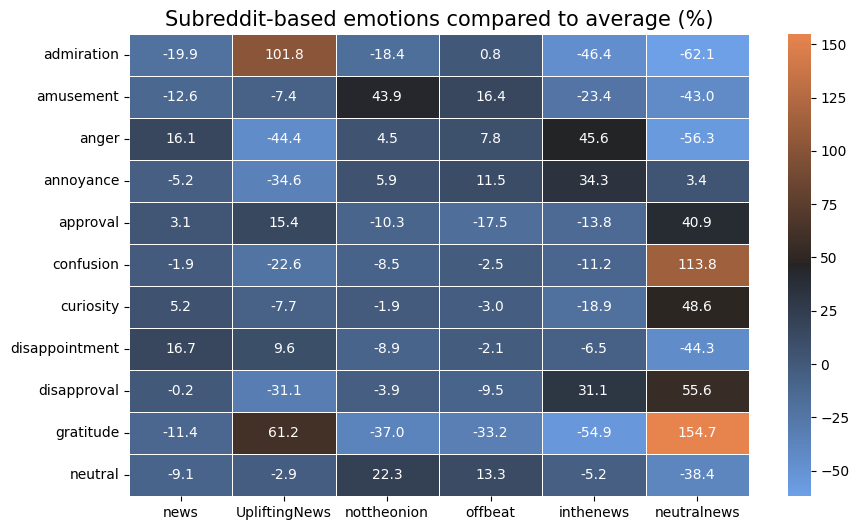

In [312]:
plt.figure(figsize=(10, 6))
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.title('Subreddit-based emotions compared to average (%)', fontsize=15)
cmap = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)
sns.heatmap(df_dist_subr_diff, cmap=cmap, annot=True, fmt=".1f", linewidths=0.5, linecolor='white')
plt.show()